<a href="https://colab.research.google.com/github/Prathamesh-chougale-17/Abstract-of-Machine-Learning-course/blob/main/Reinforcement/Upper-Confidence-Bound/upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [10]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [11]:
import math

In [12]:
N = 1000
d = 10
ad_selected = []
numbers_of_selections = [0]*d
sum_of_rewards=[]
sum_of_rewards = [0]*d
total_reward = 0
for n in range(0 ,N):
  ad = 0
  max_upper_bound = 0
  for i in range(0,d):
    if(numbers_of_selections[i]):
      average_reward = sum_of_rewards[i]/numbers_of_selections[i]
      delta_i = math.sqrt(3/2*(math.log(n+1)/numbers_of_selections[i]))
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    # max_upper_bound = max(upper_bound,max_upper_bound)
    if(upper_bound>max_upper_bound):
      max_upper_bound=upper_bound
      ad = i
  ad_selected.append(ad)
  numbers_of_selections[ad]+=1
  reward = dataset.values[n,ad]
  sum_of_rewards[ad]+=dataset.values[n,ad]
  total_reward = total_reward +reward

## Visualising the results

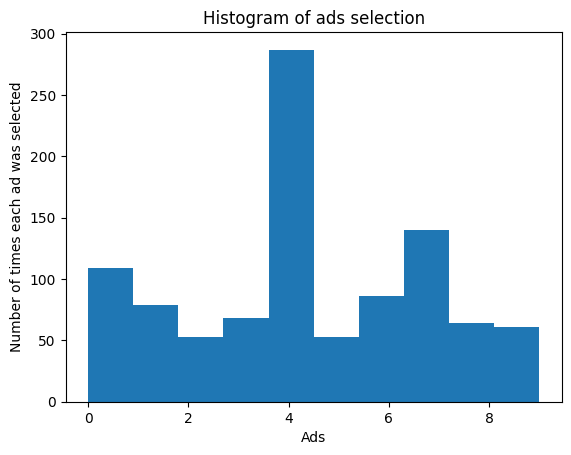

In [13]:
plt.hist(ad_selected)
plt.title("Histogram of ads selection")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()